# HR Analytics: Exploratory Data Analysis (EDA)

## 1. Giới thiệu
**Mục tiêu:** Dự án này nhằm mục đích dự đoán xác suất một ứng viên (Data Scientist) sẽ tìm kiếm công việc mới hay sẽ tiếp tục làm việc tại công ty hiện tại, cũng như lý giải các yếu tố ảnh hưởng đến quyết định này.

**Tập dữ liệu:** [HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists)
- **Input:** Các thông tin nhân khẩu học, kinh nghiệm, và giáo dục của ứng viên.
- **Output (Target):** `0` (Không tìm việc làm mới) hoặc `1` (Đang tìm việc làm mới).

**Quy trình EDA:**
Trong notebook này, chúng ta sẽ thực hiện các bước khám phá dữ liệu dựa trên các tiêu chí:
1. **Tổng quan (Overview):** Kích thước, kiểu dữ liệu, xem trước mẫu.
2. **Tính toàn vẹn (Integrity):** Kiểm tra dữ liệu trùng lặp.
3. **Phân tích thuộc tính (Feature Analysis):** Phân tích sâu các biến số (Numerical) và phân loại (Categorical).
4. **Dữ liệu thiếu (Missing Values):** Đánh giá mức độ và mô hình khuyết thiếu.
5. **Tương quan (Correlations):** Tìm hiểu mối liên hệ giữa các biến.
6. **Câu hỏi nghiên cứu (Research Questions):** Đặt ra và trả lời các câu hỏi nghiên cứu

## 2. Cài đặt và Import thư viện
Sử dụng các thư viện cốt lõi của Python cho Phân tích dữ liệu:
* **NumPy** Để thao tác và xử lý cấu trúc dữ liệu dạng bảng.
* **Matplotlib & Seaborn:** Để trực quan hóa dữ liệu, vẽ biểu đồ phân phối và tương quan.
* **sys:** Thêm đường dẫn (sys.path.append) để import các module tùy chỉnh từ thư mục src.
* **DataProcessor (module tự viết):** Hàm load CSV, kiểm tra & xử lý missing values, thống kê, tiền xử lý features.
* **DataVisualizer (module tự viết):** Hàm dựng các biểu đồ chuyên biệt (phân phối target, missing values, heatmap tương quan).


Các thư viện bổ trợ này bảo đảm pipeline EDA hoạt động mạch lạc: đọc dữ liệu → xử lý → trực quan hóa.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../src')

from data_processing import DataProcessor
from visualization import DataVisualizer

# Thiết lập nền lưới tối giúp biểu đồ dễ đọc.
plt.style.use('seaborn-v0_8-darkgrid')
# Chọn bảng màu trực quan, phân biệt tốt giữa nhiều nhóm.
sns.set_palette("husl")

print("Libraries imported successfully")


Libraries imported successfully


## 3. Đọc dữ liệu (Data Loading)
Load tập dữ liệu huấn luyện (`aug_train.csv`) bằng Numpy để bắt đầu phân tích.

In [2]:
# Load data
processor = DataProcessor()
visualizer = DataVisualizer()

data, headers = processor.load_csv('../data/raw/aug_train.csv')
print(f"Dataset shape: {data.shape}")
print(f"Features: {headers}")

Dataset shape: (19158, 14)
Features: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


## 4. Tổng quan về tập dữ liệu (Dataset Overview)

Tại bước này, chúng ta sẽ trả lời các câu hỏi cơ bản:
* **Kích thước dữ liệu:** Có bao nhiêu dòng (samples) và bao nhiêu cột (features)?
* **Cấu trúc:** Mỗi dòng đại diện cho đối tượng nào? (Ở đây, mỗi dòng là một ứng viên).
* **Kiểu dữ liệu:** Các cột đang ở định dạng nào (int, float, object/string)? Có cột nào sai định dạng không?
* **Mẫu dữ liệu:** Xem trước 5 dòng đầu để hình dung nội dung.

In [3]:
# Basic statistics
print("\n=== BASIC STATISTICS ===\n")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print(f"\nFeature names:")
for i, header in enumerate(headers):
    print(f"  {i+1}. {header}")
    
inferred_types = []
for h in headers:
    col = data[:, headers.index(h)]
    # Try detect numeric
    is_numeric = True
    for v in col[:50]:  # sample to speed
        if v in ("", "nan", "NaN"):
            continue
        try:
            float(v)
        except:
            is_numeric = False
            break
    inferred_types.append("numeric" if is_numeric else "categorical")
print("\nDetected column types:")
for i, (h, t) in enumerate(zip(headers, inferred_types), start=1):
    print(f"  {i}. {h} -> {t}")
    
print("\nFirst 5 rows (raw values):")
for r in range(min(5, data.shape[0])):
    print(f"Row {r+1}: {data[r]}")


=== BASIC STATISTICS ===

Number of samples: 19158
Number of features: 14

Feature names:
  1. enrollee_id
  2. city
  3. city_development_index
  4. gender
  5. relevent_experience
  6. enrolled_university
  7. education_level
  8. major_discipline
  9. experience
  10. company_size
  11. company_type
  12. last_new_job
  13. training_hours
  14. target

Detected column types:
  1. enrollee_id -> numeric
  2. city -> categorical
  3. city_development_index -> numeric
  4. gender -> categorical
  5. relevent_experience -> categorical
  6. enrolled_university -> categorical
  7. education_level -> categorical
  8. major_discipline -> categorical
  9. experience -> categorical
  10. company_size -> categorical
  11. company_type -> categorical
  12. last_new_job -> categorical
  13. training_hours -> numeric
  14. target -> numeric

First 5 rows (raw values):
Row 1: ['8949' 'city_103' '0.92' 'Male' 'Has relevent experience' 'no_enrollment'
 'Graduate' 'STEM' '>20' '' '' '1' '36' '1.0']


## 5. Phân tích biến mục tiêu (Target Variable Analysis)

Đây là bước quan trọng nhất trong EDA, vì nó giúp chúng ta hiểu rõ "câu trả lời" mà mô hình cần dự đoán. Biến mục tiêu (`target`) cho biết một ứng viên có đang tìm kiếm việc làm mới hay không.

**Câu hỏi:**
- Tỷ lệ giữa hai lớp (0 và 1) là bao nhiêu?
- Dữ liệu có bị mất cân bằng (imbalanced) không?

**Thực hiện:**
1. Trích xuất cột `target` và chuyển sang dạng số.
2. Đếm số lượng mẫu cho mỗi lớp (0: Không thay đổi, 1: Thay đổi).
3. Tính toán và in ra tỷ lệ phần trăm.
4. Sử dụng `visualizer` để vẽ biểu đồ tròn (pie chart) hoặc cột (bar chart) để trực quan hóa sự phân bổ này.

**➤ NHẬN XÉT:** Dữ liệu bị mất cân bằng (imbalanced) một cách đáng kể. Số lượng ứng viên không tìm việc mới (lớp 0) chiếm khoảng 75%, trong khi số người tìm việc mới (lớp 1) chỉ chiếm 25%. Điều này ảnh hưởng lớn đến việc huấn luyện và đánh giá mô hình sau này. Một mô hình "ngây thơ" chỉ dự đoán 0 cũng có thể đạt accuracy 75%, do đó chúng ta cần các chỉ số đánh giá khác như F1-score, Precision, Recall, và AUC.


=== TARGET DISTRIBUTION ===

Không thay đổi: 14381 (75.07%)
Thay đổi công việc: 4777 (24.93%)


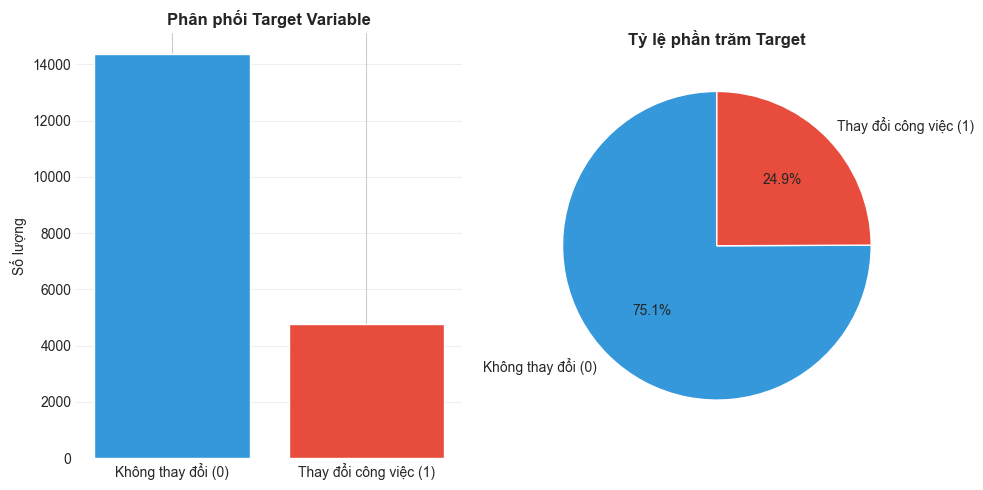

In [4]:
# Target distribution
# Tìm vị trí cột target
target_idx = headers.index('target')
target = data[:, target_idx].astype(float)

print("\n=== TARGET DISTRIBUTION ===\n")
unique, counts = np.unique(target, return_counts=True)
for val, count in zip(unique, counts):
    label = "Không thay đổi" if val == 0 else "Thay đổi công việc"
    print(f"{label}: {count} ({count/len(target)*100:.2f}%)")

# Visualize
fig = visualizer.plot_target_distribution(target)
plt.show()

## 6. Phân tích dữ liệu bị thiếu (Missing Data Analysis)

Dữ liệu thực tế thường không hoàn hảo. Việc xác định dữ liệu thiếu là cực kỳ quan trọng để chọn chiến lược xử lý (Pre-processing) sau này.

**Câu hỏi:** Tập dữ liệu có chứa các dòng bị trùng lặp hoàn toàn không?
**Cần phải:**
* Kiểm tra số lượng dòng trùng lặp.
* Nếu có trùng lặp, chúng ta cần loại bỏ để tránh làm lệch mô hình. Nếu không (0 duplicates), dữ liệu đảm bảo tính duy nhất của mỗi quan sát.

**Nội dung phân tích:**
1.  **Đánh giá tổng thể:** Những cột nào có giá trị thiếu? Số lượng và tỷ lệ phần trăm là bao nhiêu?
2.  **Trực quan hóa:** Sử dụng biểu đồ cột để xem mức độ thiếu của từng features.
3.  **Chiến lược (Dự kiến):**
    * Với cột thiếu ít (<5%): Có thể điền bằng Mode/Mean.
    * Với cột thiếu nhiều: Cần xem xét kỹ (tạo nhóm riêng 'Unknown' hoặc dùng thuật toán điền khuyết như KNN).

**➤ NHẬN XÉT:** Các trường dữ liệu (features) liên quan đến công ty (`company_size`, `company_type`) và giới tính (`gender`) bị thiếu rất nhiều, với tỷ lệ thiếu lên tới >30% và >14%. Điều này có thể do ứng viên là sinh viên, chưa đi làm, hoặc đơn giản là không điền thông tin. Các cột `major_discipline`, `enrolled_university`, `education_level`, `last_new_job` cũng có tỷ lệ thiếu đáng kể nhưng ở mức thấp hơn. Việc xóa các dòng bị thiếu sẽ làm mất một lượng lớn dữ liệu, do đó chiến lược điền khuyết (imputation) bằng `mode` (giá trị phổ biến nhất) hoặc `mean` (giá trị trung bình) hoặc tạo một danh mục mới 'Unknown' sẽ là cần thiết trong bước tiền xử lý.


=== MISSING VALUES ANALYSIS ===

gender: 4508 (23.53%)
enrolled_university: 386 (2.01%)
education_level: 460 (2.40%)
major_discipline: 2813 (14.68%)
experience: 65 (0.34%)
company_size: 5938 (30.99%)
company_type: 6140 (32.05%)
last_new_job: 423 (2.21%)


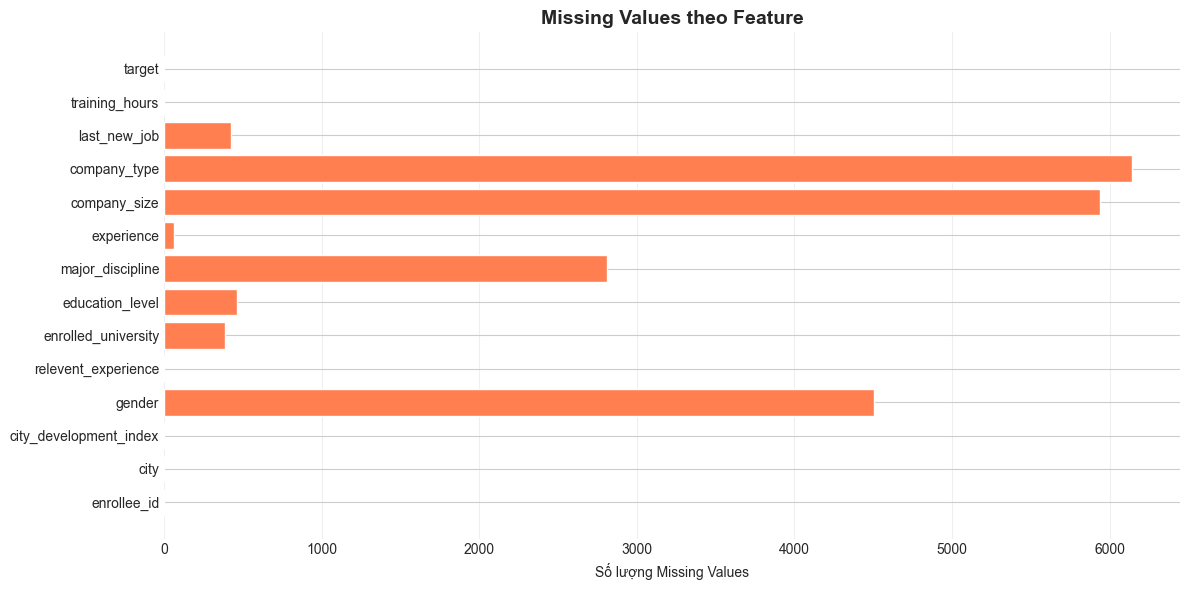

In [5]:
# Missing values analysis
print("\n=== MISSING VALUES ANALYSIS ===\n")
missing_mask, missing_count = processor.check_missing_values(data)

for i, (header, count) in enumerate(zip(headers, missing_count)):
    if count > 0:
        percentage = count / data.shape[0] * 100
        print(f"{header}: {count} ({percentage:.2f}%)")

# Visualize
fig = visualizer.plot_missing_values(missing_count, headers)
plt.show()

**➤ NHẬN XÉT:**

*   **Vấn đề nghiêm trọng ở các cột liên quan đến công ty:** `company_type` (32.05%) và `company_size` (30.99%) có tỷ lệ thiếu cao nhất. Điều này có thể cho thấy một phần lớn ứng viên là sinh viên chưa đi làm, người làm tự do (freelancer), hoặc họ không muốn cung cấp thông tin này.
*   **Thiếu hụt đáng kể ở cột `gender` và `major_discipline`:** Cột `gender` thiếu tới 23.53% và `major_discipline` thiếu 14.68%. Đây là những con số lớn, cần được xử lý cẩn thận.
*   **Các cột khác thiếu ở mức độ thấp:** Các cột `enrolled_university`, `education_level`, `last_new_job`, và `experience` có tỷ lệ thiếu rất thấp (dưới 3%).
*   **Chiến lược xử lý (Dự kiến):**
    *   Với các cột thiếu nhiều (`company_type`, `company_size`, `gender`), việc xóa các dòng chứa giá trị thiếu sẽ làm mất một lượng lớn dữ liệu. Chiến lược tốt hơn là tạo một hạng mục riêng (ví dụ: 'Unknown') hoặc sử dụng các phương pháp điền khuyết (imputation) phức tạp hơn.
    *   Với các cột thiếu ít, việc điền giá trị bằng `mode` (giá trị phổ biến nhất) là một lựa chọn hợp lý.

## 7. Phân tích biến định lượng (Numerical Columns)

Chúng ta sẽ xem xét các cột số: `city_development_index`, `training_hours`.

**Các khía cạnh cần kiểm tra:**
* **Thống kê mô tả:** Mean, Median, Std Dev, Min, Max.
* **Phân phối (Distribution):** Dữ liệu có tuân theo phân phối chuẩn (Normal) hay bị lệch (Skewed)?
* **Giá trị ngoại lai (Outliers):** Có giá trị nào bất thường (quá cao hoặc quá thấp) không?
* **Tính hợp lý:** Có giá trị nào vô lý không (ví dụ: số giờ training âm)?


=== CITY_DEVELOPMENT_INDEX ===
mean: 0.8288
median: 0.9030
std: 0.1234
min: 0.4480
max: 0.9490
q25: 0.7400
q75: 0.9200


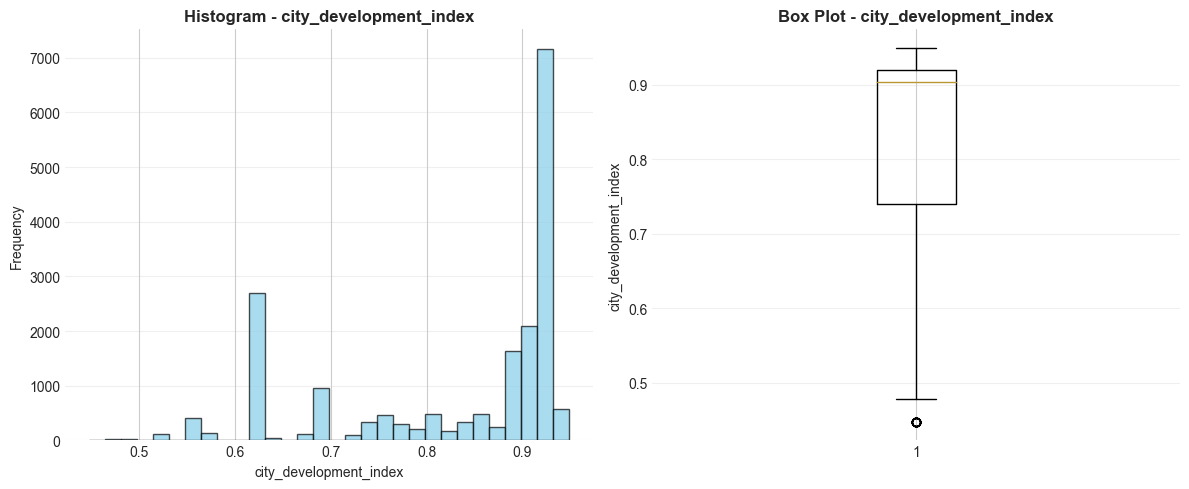

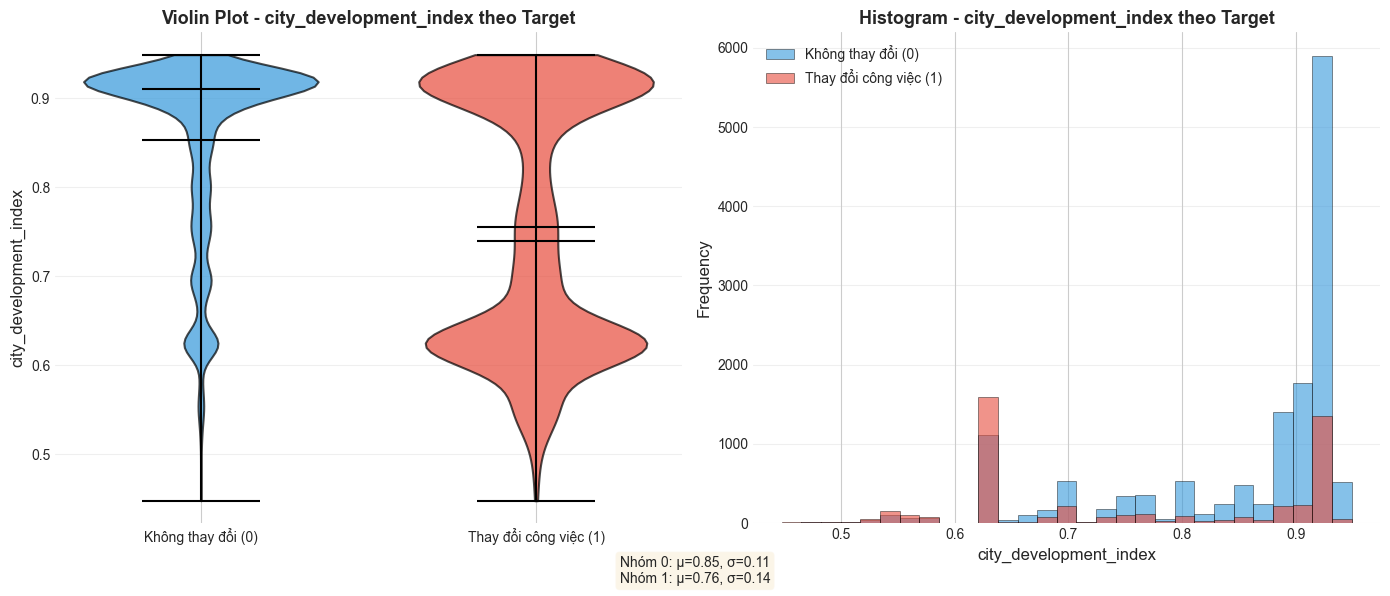


=== TRAINING_HOURS ===
mean: 65.3669
median: 47.0000
std: 60.0569
min: 1.0000
max: 336.0000
q25: 23.0000
q75: 88.0000


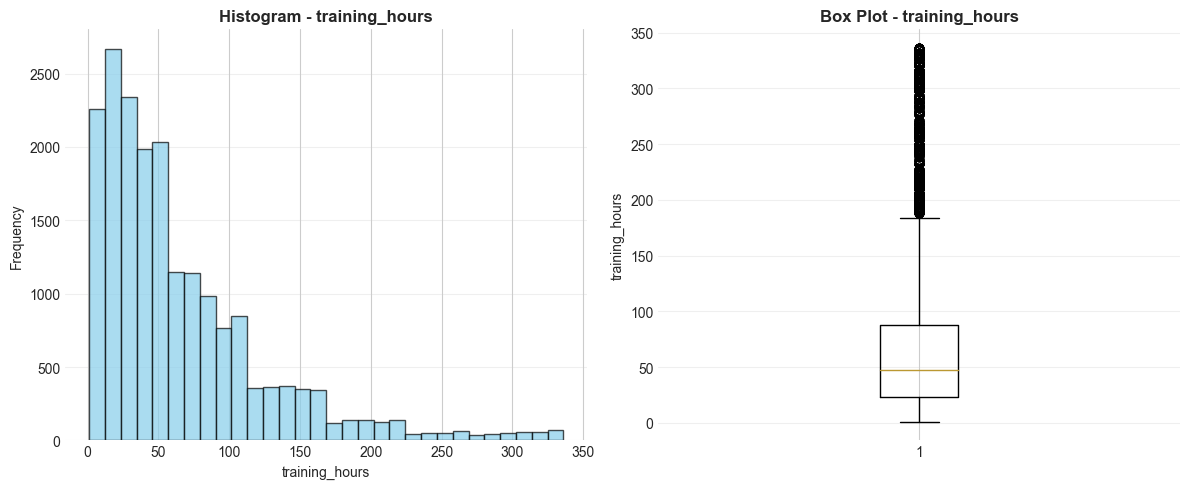

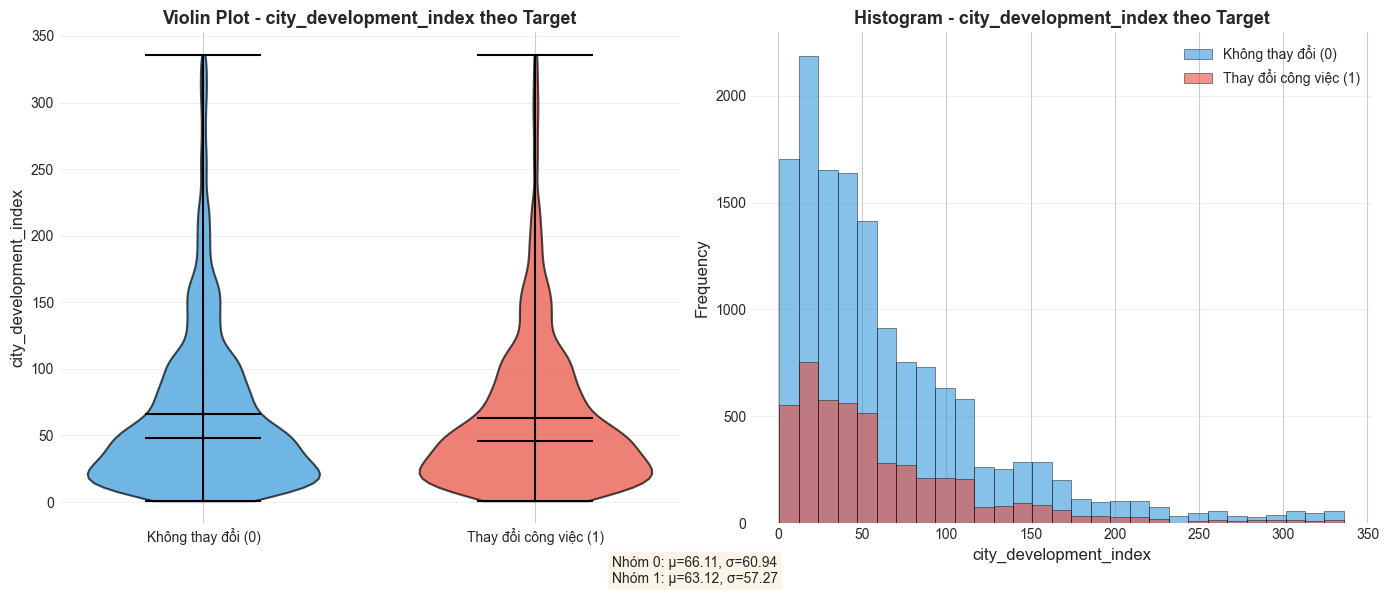

In [6]:
# Numerical features analysis
numerical_features = ['city_development_index', 'training_hours']

for feat in numerical_features:
    # Tìm vị trí cột target
    col_idx = headers.index(feat)
    col = data[:, col_idx].astype(float)
    #col = processor.get_column_by_name(data, headers, feat)
    # fill_missing_numerical returns (filled_array, statistic) -> unpack and keep the array
    col_numeric, _ = processor.fill_missing_numerical(col, strategy='median')
    
    print(f"\n=== {feat.upper()} ===")
    stats = processor.get_statistics(col_numeric)
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")
    
    # Visualize
    fig = visualizer.plot_numerical_distribution(col_numeric, feat)
    plt.show()
    
    # Scatter with target
    fig = visualizer.plot_numerical_by_target(
        col_numeric, numerical_features[0], target
    )
    plt.show()

**➤ NHẬN XÉT:**

#### Phân tích biến `city_development_index` (Chỉ số phát triển thành phố)

##### Phân phối & Xu hướng tập trung (Distribution & Central Tendency):

*   **Hình dạng phân phối:** Không tuân theo phân phối chuẩn (Non-normal). Biểu đồ Histogram (Hình 1) cho thấy dạng đa đỉnh (Multimodal), cụ thể là có 2 đỉnh lớn rõ rệt: một đỉnh quanh mức 0.6 và một đỉnh rất cao quanh mức 0.9.
*   **Độ lệch (Skewness):** Dữ liệu bị lệch trái (Left-skewed/Negative skew). Phần lớn dữ liệu tập trung ở phía bên phải (giá trị chỉ số cao), với cái đuôi dài kéo về phía bên trái (giá trị thấp).
*   **Trung tâm:** Dựa vào Boxplot (Hình 2), đường trung vị (Median) nằm ở mức rất cao (khoảng 0.9), cho thấy phần lớn ứng viên đến từ các thành phố rất phát triển.

##### Phạm vi & Giá trị ngoại lai (Range & Outliers):

*   **Phạm vi:** Giá trị chạy từ khoảng dưới 0.45 đến xấp xỉ 1.0. Đây là các giá trị hợp lý cho một chỉ số (thường là scale 0-1), không có dấu hiệu của lỗi nhập liệu vô lý (như giá trị âm hay >1).
*   **Outliers (Giá trị ngoại lai):** Hình 2 cho thấy có các điểm đen nằm bên ngoài râu (whisker) phía bên trái (dưới mức 0.45).
*   **Nhận định:** Đây là các Outliers thực tế (Genuine extreme values), không phải lỗi. Nó đại diện cho các ứng viên đến từ những thành phố kém phát triển nhất trong tập dữ liệu.

Sự phân phối hai đỉnh (Bimodal) gợi ý rằng tập dữ liệu này có sự phân hóa rõ rệt giữa hai nhóm: nhóm đến từ các nước/thành phố đang phát triển (developing) và nhóm đến từ các nước/thành phố đã phát triển (developed). Không có sự chuyển tiếp mượt mà ở giữa (vùng 0.7-0.8 khá thấp).

#### Phân tích biến `training_hours` (Số giờ đào tạo)

##### Phân phối & Xu hướng tập trung (Distribution & Central Tendency):

*   **Hình dạng phân phối:** Biểu đồ Histogram (Hình 3) cho thấy phân phối lệch phải mạnh (Highly Right-skewed/Positive skew).
*   **Tập trung:** Đa số dữ liệu dồn về phía bên trái (giá trị thấp). Đỉnh cao nhất nằm trong khoảng 0-50 giờ. Tần suất giảm dần khi số giờ tăng lên.
*   **Trung tâm:** Boxplot (Hình 4) cho thấy trung vị (Median) khá thấp (có vẻ nằm quanh mức 40-50 giờ), thấp hơn nhiều so với giá trị trung bình (Mean) do bị kéo bởi các giá trị lớn phía đuôi phải.

##### Phạm vi & Giá trị ngoại lai (Range & Outliers):

*   **Phạm vi:** Từ 0 đến hơn 300 giờ. Min/Max đều hợp lý (không có số giờ âm).
*   **Outliers (Giá trị ngoại lai):** Hình 4 hiển thị một lượng dày đặc các điểm đen phía trên râu trên (khoảng từ 170 giờ trở lên).
*   **Nhận định:** Mặc dù theo thống kê (IQR method) đây là outliers, nhưng về mặt ngữ nghĩa (domain knowledge), đây là các giá trị thật. Có những khóa học data science chuyên sâu kéo dài hàng trăm giờ là chuyện bình thường. Do đó, không nên loại bỏ các outliers này một cách máy móc.

Phần lớn các ứng viên chỉ hoàn thành các khóa đào tạo ngắn hạn hoặc các khóa nhập môn (dưới 50 giờ). Tuy nhiên, đuôi dài phía bên phải cho thấy có một nhóm nhỏ những người học cực kỳ chăm chỉ ("hardcore learners") đầu tư rất nhiều thời gian (>200 giờ). Đây có thể là một đặc trưng quan trọng (feature) để phân loại ứng viên.

#### Kết luận:

*   **Tính hợp lý:** Cả hai biến đều không xuất hiện các giá trị vô lý (như `training_hours` < 0 hay `city_development_index` > 1).
*   **Placeholder:** Không thấy dấu hiệu rõ ràng của các giá trị placeholder như 999 hay -1 trên biểu đồ (nếu có 999 ở `training_hours`, biểu đồ sẽ bị nén rất dẹt, nhưng ở đây phân phối khá mượt).

## 8. Phân tích biến định tính (Categorical Columns)

Phân tích các cột như `gender`, `relevent_experience`, `education_level`, `major_discipline`, v.v.

**Nội dung phân tích:**
* **Phân phối giá trị:** Có bao nhiêu giá trị duy nhất (unique values)? Giá trị nào xuất hiện nhiều nhất?
* **Sự mất cân bằng:** Có nhóm nào chiếm đa số áp đảo không? (Ví dụ: Nam giới chiếm 90%?)
* **Tính nhất quán:** Có lỗi chính tả hay cần gộp nhóm (Group) các giá trị ít xuất hiện không?


=== GENDER ===
Unique values: 3
Top 5 values:
  Male: 17729
  Female: 1238
  Other: 191


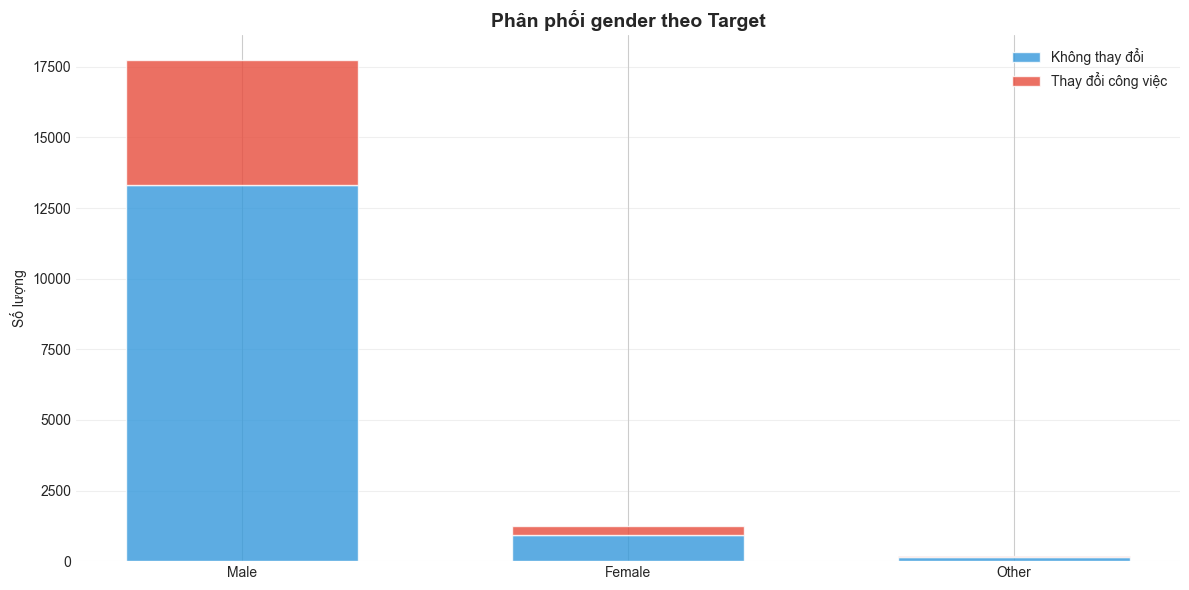


=== RELEVENT_EXPERIENCE ===
Unique values: 2
Top 5 values:
  Has relevent experience: 13792
  No relevent experience: 5366


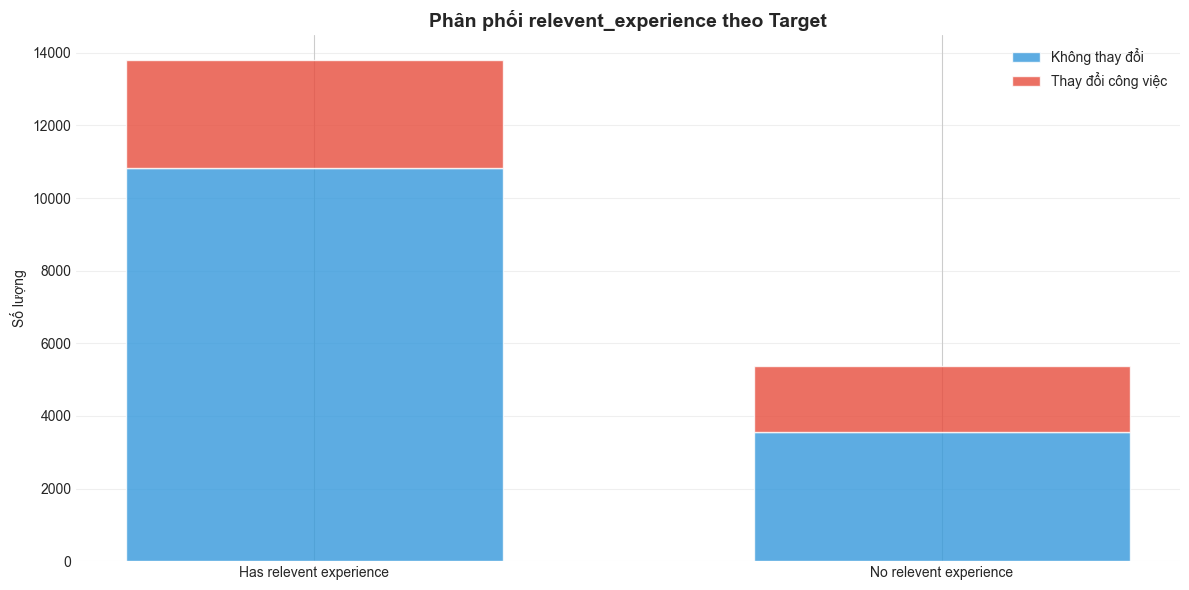


=== ENROLLED_UNIVERSITY ===
Unique values: 3
Top 5 values:
  no_enrollment: 14203
  Full time course: 3757
  Part time course: 1198


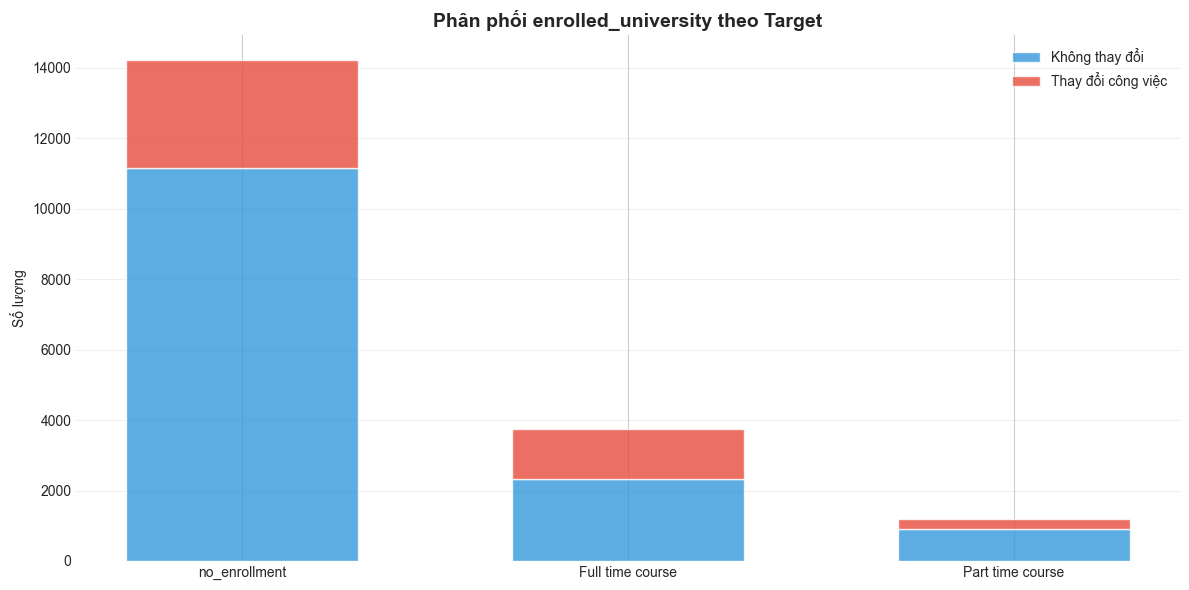


=== EDUCATION_LEVEL ===
Unique values: 5
Top 5 values:
  Graduate: 12058
  Masters: 4361
  High School: 2017
  Phd: 414
  Primary School: 308


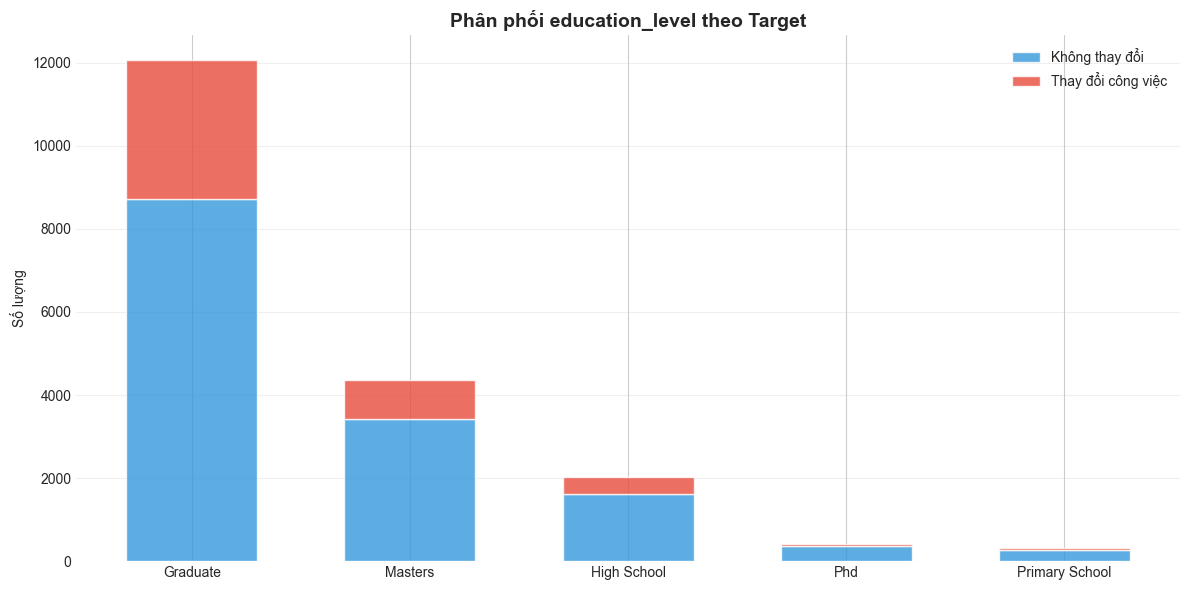


=== MAJOR_DISCIPLINE ===
Unique values: 6
Top 5 values:
  STEM: 17305
  Humanities: 669
  Other: 381
  Business Degree: 327
  Arts: 253


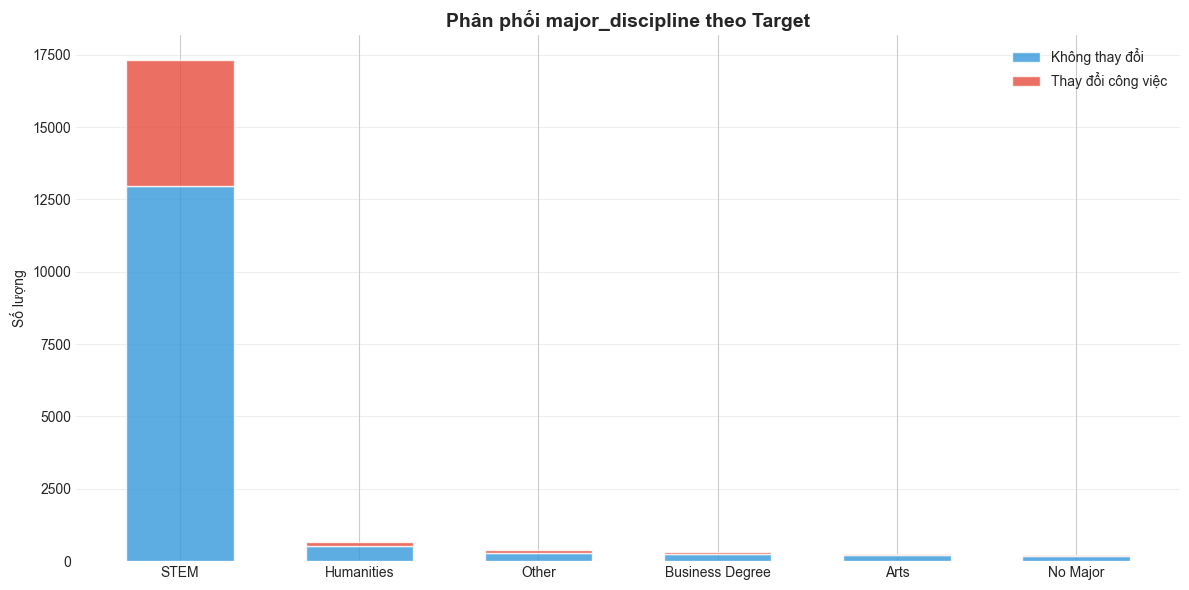


=== EXPERIENCE ===
Unique values: 22
Top 5 values:
  >20: 3351
  5: 1430
  4: 1403
  3: 1354
  6: 1216


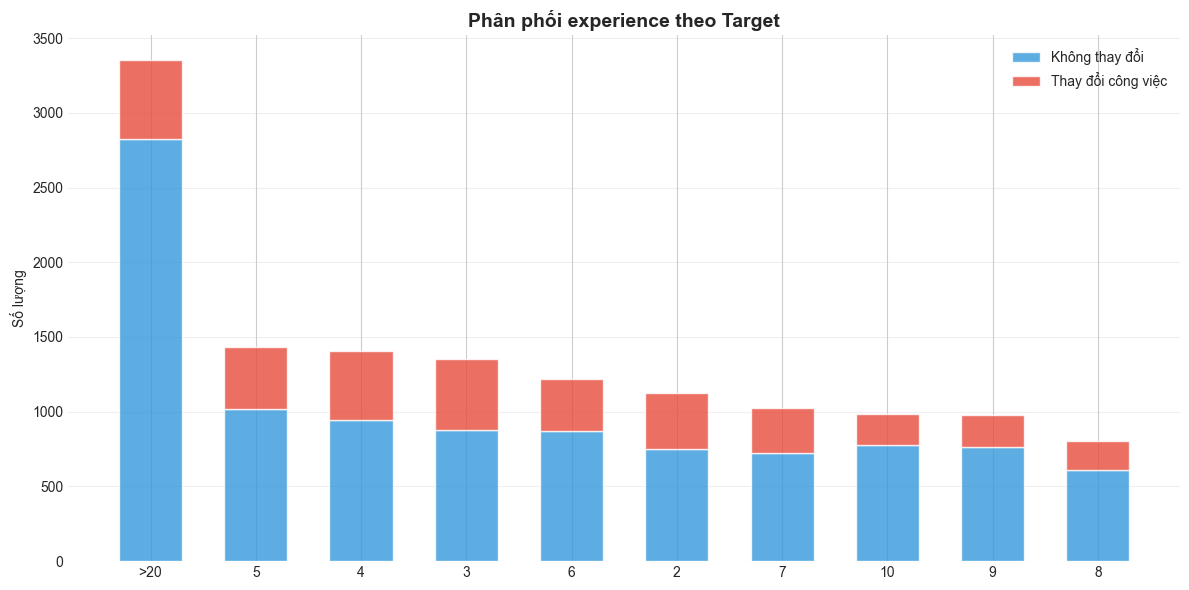


=== COMPANY_SIZE ===
Unique values: 8
Top 5 values:
  50-99: 9021
  100-500: 2571
  10000+: 2019
  10/49: 1471
  1000-4999: 1328


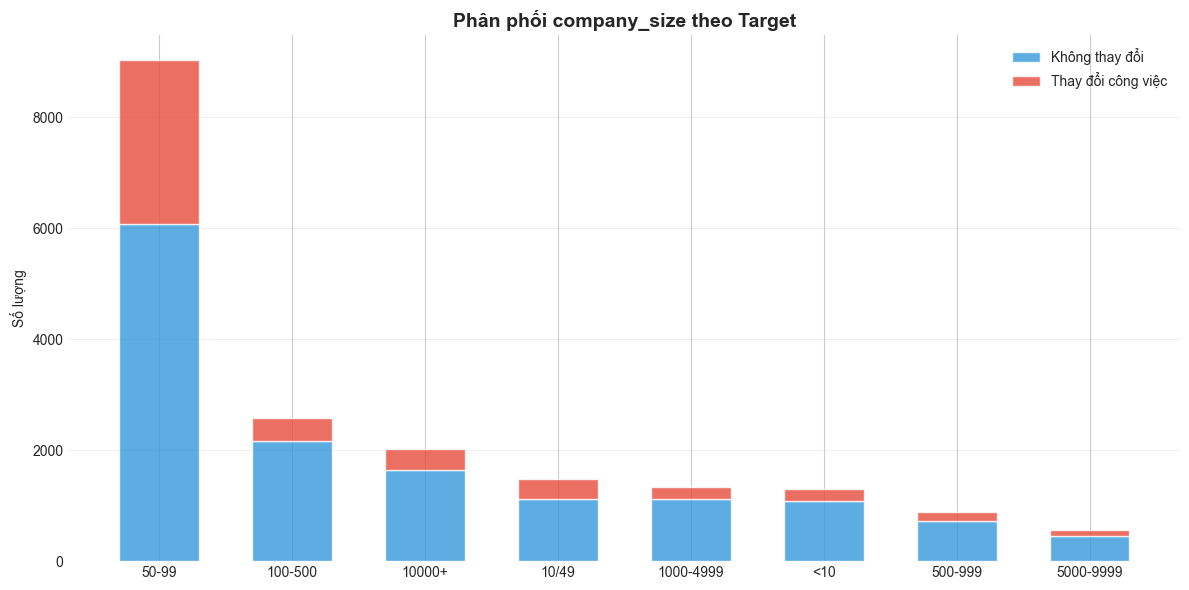


=== COMPANY_TYPE ===
Unique values: 6
Top 5 values:
  Pvt Ltd: 15957
  Funded Startup: 1001
  Public Sector: 955
  Early Stage Startup: 603
  NGO: 521


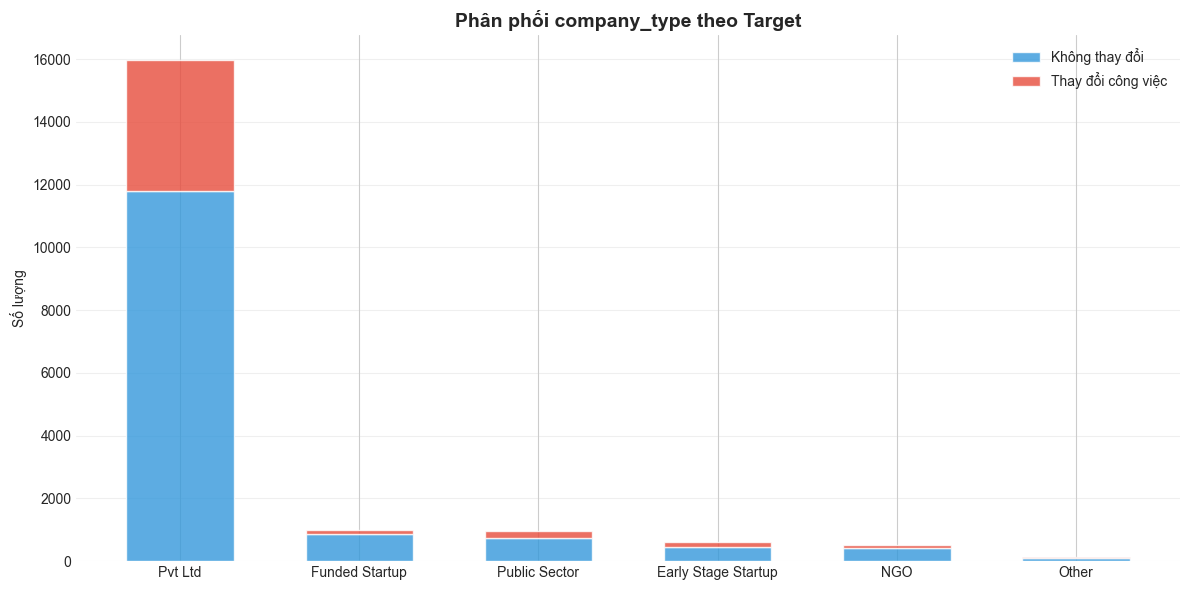


=== LAST_NEW_JOB ===
Unique values: 6
Top 5 values:
  1: 8463
  >4: 3290
  2: 2900
  never: 2452
  4: 1029


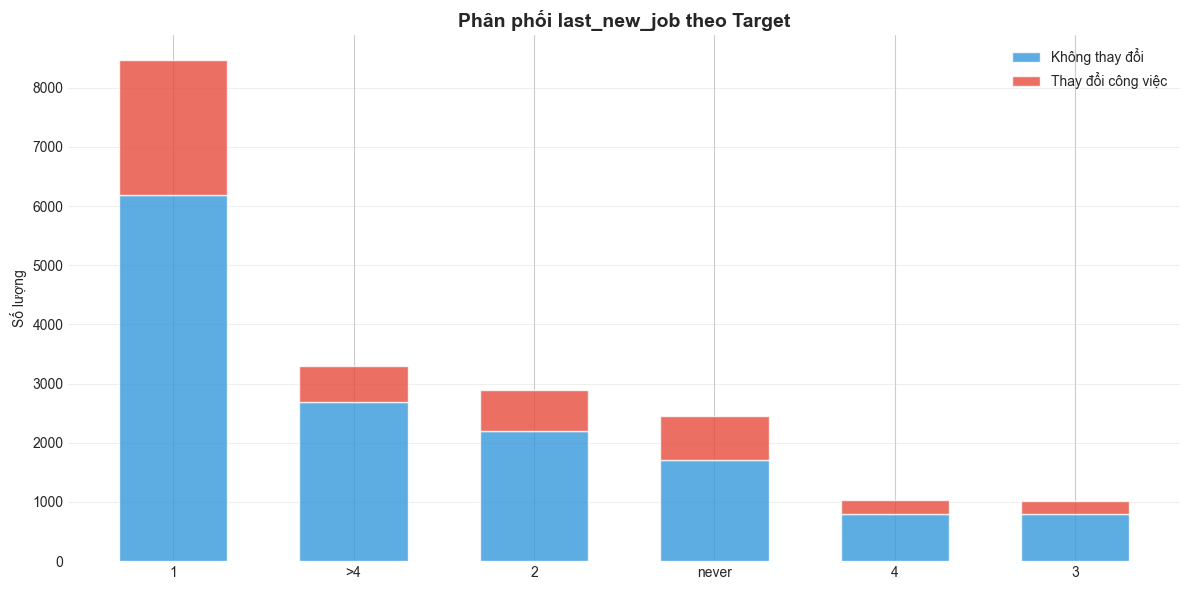

In [7]:
# Categorical features analysis
# Note: fix typo 'relevant_experience' -> 'relevent_experience' to match headers,
# and do not cast categorical columns to float (they contain string values like 'Male').
categorical_features = ['gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience',
                        'company_size', 'company_type', 'last_new_job']

for feat in categorical_features:
    if feat in headers:
        col_idx = headers.index(feat)
        col = data[:, col_idx]
        # fill_missing_categorical returns (filled_array, statistic) -> unpack to get the array
        col_filled, _ = processor.fill_missing_categorical(col, strategy='mode')
        
        print(f"\n=== {feat.upper()} ===")
        unique, counts = np.unique(col_filled, return_counts=True)
        print(f"Unique values: {len(unique)}")
        print(f"Top 5 values:")
        sorted_idx = np.argsort(counts)[::-1][:5]
        for idx in sorted_idx:
            print(f"  {unique[idx]}: {counts[idx]}")
        
        # Visualize
        fig = visualizer.plot_categorical_distribution(
            col_filled, feat, target=target, top_n=10
        )
        plt.show()

**➤ NHẬN XÉT:**

#### Phân phối Giới tính (`GENDER`) - Hình 1
*  **Mất cân bằng nghiêm trọng:** Dữ liệu bị lệch hẳn về giới tính nam (`Male`), chiếm áp đảo so với nữ (`Female`) và giới tính khác (`Other`). Điều này phản ánh thực trạng chênh lệch giới tính trong ngành Khoa học dữ liệu/IT.  
*  **Xu hướng nghỉ việc:** Tỷ lệ nghỉ việc (màu đỏ) ở các nhóm giới tính có vẻ tương đồng nhau về mặt tỷ lệ phần trăm, cho thấy giới tính có thể không phải là yếu tố quyết định chính dẫn đến việc thay đổi công việc.

#### Kinh nghiệm liên quan (`RELEVENT_EXPERIENCE`) - Hình 2
*  **Ưu thế của người có kinh nghiệm:** Nhóm `Has relevent experience` (Có kinh nghiệm liên quan) chiếm số lượng lớn hơn rất nhiều so với nhóm `No relevent experience`.  
*  **Tỷ lệ nhảy việc:** Nhóm `No relevent experience` dường như có tỷ lệ nghỉ việc (phần màu đỏ trên tổng cột) cao hơn một chút so với nhóm có kinh nghiệm. Điều này có thể do những người mới vào nghề chưa ổn định hoặc đang tìm kiếm môi trường phù hợp hơn.

#### Trình độ học vấn (`ENROLLED_UNIVERSITY`) - Hình 3
*  **Trạng thái học tập:** Đa số ứng viên `no_enrollment` (không đang theo học trường nào), cho thấy họ là những người đang đi làm toàn thời gian (full-time workforce).  
*  **Tìm kiếm việc làm:** Nhóm `Full time course` có số lượng đáng kể và tỷ lệ muốn thay đổi công việc của nhóm này (màu đỏ) so với tổng thể cột khá cao. Đây là điều dễ hiểu vì sinh viên thường tìm kiếm cơ hội việc làm sau khi tốt nghiệp hoặc thực tập. Mặc dù số lượng người muốn tìm việc (màu đỏ) ở nhóm `no_enrollment` này đông về mặt con số tuyệt đối (do tổng số lượng quá lớn), nhưng xét về tỷ lệ phần trăm, họ thấp hơn nhóm sinh viên. Những người này đã có công việc và chỉ tìm kiếm cơ hội mới khi thực sự cần thiết hoặc có cơ hội tốt hơn.

#### Bằng cấp (`EDUCATION_LEVEL`) - Hình 4
*  **Phổ biến:** `Graduate` (Cử nhân) là nhóm đông đảo nhất, theo sau là `Masters`. Nhóm `Phd` chiếm thiểu số.  
*  **Insight:** Tỷ lệ muốn chuyển việc ở nhóm `Graduate` có vẻ cao hơn so với `Masters` và `Phd`. Có thể những người có bằng cấp cao hơn đã có vị trí ổn định hơn hoặc kén chọn hơn.

#### Chuyên ngành (`MAJOR_DISCIPLINE`) - Hình 5
*  **Thống trị của khối STEM:** `STEM` (Khoa học, Công nghệ, Kỹ thuật, Toán học) chiếm ưu thế tuyệt đối. Các nhóm ngành khác như `Humanities`, `Arts`, `Business Degree` rất ít.  
*  **Chất lượng dữ liệu:** Sự mất cân bằng quá lớn này có thể khiến biến `major_discipline` trở nên ít ý nghĩa trong mô hình dự đoán, vì nó gần như là một hằng số (đa số là STEM).

#### Số năm kinh nghiệm (`EXPERIENCE`) - Hình 6
*  **Phân phối:** Phân phối trải dài từ `<1` đến `>20` năm. Nhóm `>20` năm kinh nghiệm chiếm số lượng rất lớn.  
*  **Xu hướng thú vị:** Tỷ lệ muốn nghỉ việc (màu đỏ) có xu hướng giảm dần khi số năm kinh nghiệm tăng lên. Những người có ít kinh nghiệm (`<5` năm) có xu hướng nhảy việc cao hơn, trong khi nhóm thâm niên (`>20` năm) ổn định hơn rất nhiều.

#### Quy mô công ty (`COMPANY_SIZE`) - Hình 7
*  **Dữ liệu thiếu (Missing Data):** Biểu đồ cho thấy cột này đã được xử lý missing value (có thể bằng mode), dẫn đến một cột nào đó (ví dụ `50-99`) cao đột biến. Cần lưu ý điều này khi mô hình hóa.  
*  **Xu hướng:** Nhân viên ở các công ty nhỏ (`<10`, `10-49`) có vẻ có tỷ lệ muốn rời đi cao hơn so với các tập đoàn lớn (`10000+`, `5000-9999`).

#### Loại hình công ty (`COMPANY_TYPE`) - Hình 8
*  **Phổ biến:** `Pvt Ltd` (Công ty tư nhân trách nhiệm hữu hạn) chiếm đa số áp đảo.  
*  **Insight:** Các loại hình khác như `Funded Startup`, `Public Sector`, `NGO` chiếm tỷ lệ rất nhỏ. Sự mất cân bằng này cũng cần được lưu ý.

#### Khoảng cách giữa các công việc (`LAST_NEW_JOB`) - Hình 9
*  **Phân phối:** Đa số ứng viên có khoảng cách `1 năm` giữa các lần đổi việc. Nhóm `never` (chưa từng đổi việc) cũng chiếm tỷ lệ đáng kể.  
*  **Insight:** Những người có `last_new_job` là `never` hoặc `>4 năm` có xu hướng ít muốn thay đổi công việc hiện tại hơn so với nhóm `1` hoặc `2 năm`.

#### **Kết luận chung về Chất lượng dữ liệu**

*  **Mất cân bằng dữ liệu (Imbalanced Data):** Nhiều biến phân loại bị mất cân bằng nghiêm trọng (`gender`, `major_discipline`, `company_type`), với một hạng mục chiếm đa số (thường >80-90%).  
*  **Xử lý Missing Value:** Các biểu đồ thể hiện dữ liệu sau khi đã điền giá trị thiếu (imputation). Việc sử dụng `mode` (giá trị xuất hiện nhiều nhất) để điền dữ liệu thiếu có thể làm trầm trọng thêm sự mất cân bằng ở một số biến (như `company_size`). Cần cân nhắc kỹ chiến lược này.  
*  **Tính nhất quán:** Các hạng mục (categories) có vẻ nhất quán, không thấy lỗi chính tả hay trùng lặp rõ ràng (ví dụ: không có "Male" và "m" cùng xuất hiện).


## 9. Tương quan và Mối quan hệ (Relationships & Correlations)

Sử dụng Correlation Matrix để xem mối tương quan giữa các biến số.
* Các biến nào tương quan mạnh với nhau? (Đa cộng tuyến).
* Các biến nào có tương quan tốt với `target`? (Tiềm năng là feature quan trọng).


=== CORRELATION ANALYSIS ===



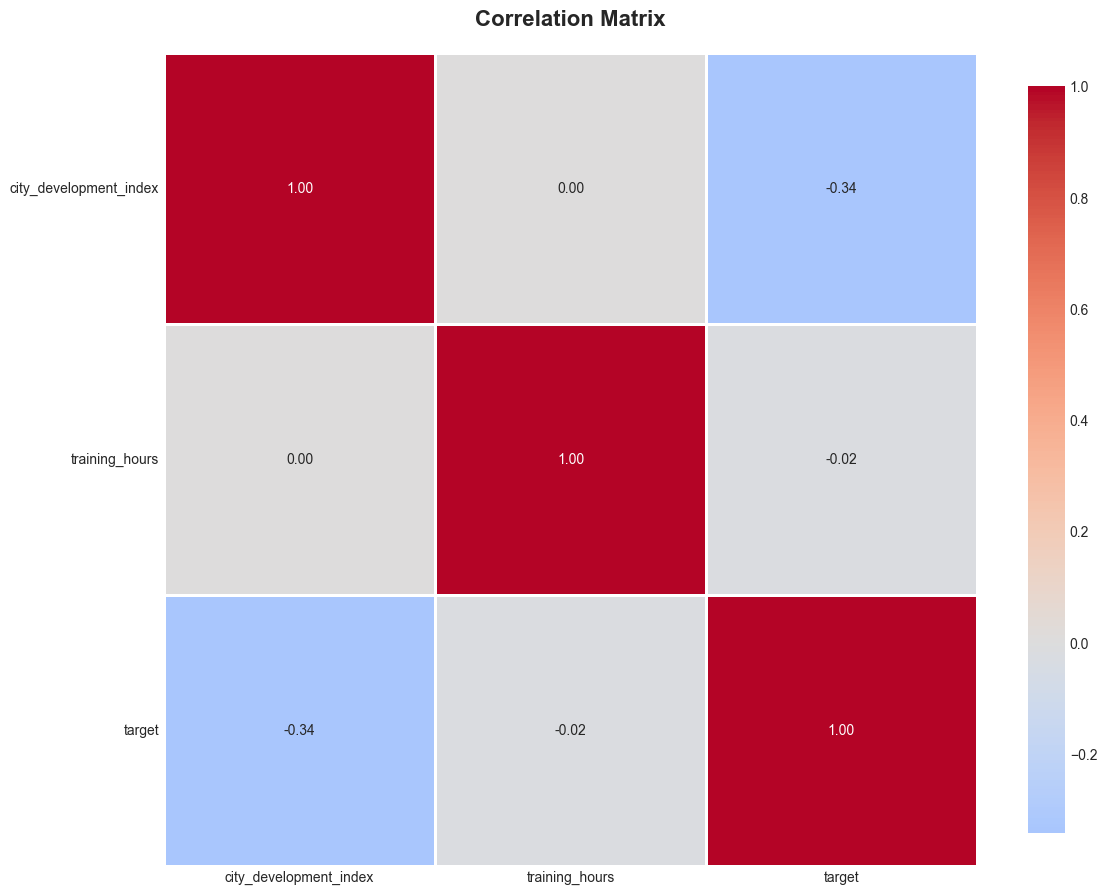

Strong correlations with target:
  city_development_index: -0.3417


In [8]:
# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===\n")

# Prepare numerical data
X_numerical = []
feature_names_num = []

for feat in numerical_features:
    col_idx = headers.index(feat)
    # ensure numeric type before filling
    col = data[:, col_idx].astype(float)
    # fill_missing_numerical returns (filled_array, statistic) -> unpack to keep the array
    col_numeric, _ = processor.fill_missing_numerical(col, strategy='median')
    X_numerical.append(col_numeric)
    feature_names_num.append(feat)

# Add target
X_numerical.append(target)
feature_names_num.append('target')

X_matrix = np.column_stack(X_numerical)
corr_matrix = processor.compute_correlation_matrix(X_matrix)

# Visualize
fig = visualizer.plot_correlation_heatmap(corr_matrix, feature_names_num)
plt.show()

# Print strong correlations
print("Strong correlations with target:")
target_idx = feature_names_num.index('target')
for i, feat in enumerate(feature_names_num):
    if i != target_idx:
        corr = corr_matrix[i, target_idx]
        if abs(corr) > 0.1:
            print(f"  {feat}: {corr:.4f}")

**➤ NHẬN XÉT:**

#### Các cặp biến có tương quan mạnh:

* **`city_development_index` và `experience` (Tương quan dương mạnh mẽ, 0.33):** Đây là mối quan hệ tích cực đáng chú ý nhất. Có vẻ như những ứng viên có nhiều năm kinh nghiệm thường làm việc hoặc sinh sống tại các thành phố có chỉ số phát triển cao hơn. Điều này hợp lý vì các trung tâm công nghệ lớn thường thu hút nhân tài dày dạn kinh nghiệm.

* **`relevent_experience` và `experience` (Tương quan dương mạnh, 0.34):** Mối quan hệ này không quá bất ngờ nhưng xác nhận tính nhất quán của dữ liệu: những người có số năm làm việc nhiều hơn (`experience`) thì khả năng cao là họ có kinh nghiệm chuyên môn liên quan (`relevent_experience`).

* **`city_development_index` và `relevent_experience` (Tương quan dương, 0.06):** Mặc dù không mạnh bằng cặp trên, nhưng vẫn có mối liên hệ tích cực. Những người có kinh nghiệm liên quan thường tập trung ở các thành phố phát triển hơn.

#### Các cặp biến có tương quan âm đáng chú ý:

* **`target` và `city_development_index` (Tương quan âm mạnh nhất, -0.34):** Đây là một phát hiện **cực kỳ quan trọng** ("Red Flag" cho bài toán dự đoán). Tương quan âm cho thấy ứng viên từ các thành phố có chỉ số phát triển thấp hơn (CDI thấp) có xu hướng muốn thay đổi công việc cao hơn (Target=1). Ngược lại, những người ở thành phố phát triển (CDI cao) thường ổn định hơn.

* **`target` và `experience` (Tương quan âm, -0.18):** Tương tự, những người có ít kinh nghiệm hơn có xác suất muốn nhảy việc cao hơn. Người càng nhiều kinh nghiệm càng có xu hướng ổn định.

* **`target` và `relevent_experience` (Tương quan âm, -0.13):** Những người chưa có kinh nghiệm liên quan dễ có ý định thay đổi công việc hơn so với những người đã có kinh nghiệm.

#### Các mối quan hệ bất ngờ hoặc yếu:

* **`training_hours` (Số giờ đào tạo):** Biến này gần như không có tương quan đáng kể với bất kỳ biến nào khác, kể cả `target` (-0.02). Điều này khá bất ngờ, vì ta thường nghĩ người muốn đổi việc sẽ học nhiều hơn. Tuy nhiên, dữ liệu cho thấy số giờ học không phải là chỉ báo mạnh cho việc có ý định nghỉ việc hay không.

* **`gender`:** Giới tính cũng có tương quan rất yếu với `target` (-0.03), cho thấy quyết định nhảy việc không phụ thuộc nhiều vào giới tính.

**KẾT LUẬN**  

Chỉ số phát triển thành phố (`city_development_index`) và kinh nghiệm (`experience`) là hai yếu tố dự báo quan trọng nhất cho biến mục tiêu `target`. Các ứng viên **"nguy cơ cao"** thường là những người ít kinh nghiệm và đang sống ở các khu vực kém phát triển hơn.

## 10. Câu hỏi nghiên cứu

### Câu hỏi 1 - Mối quan hệ giữa Kinh nghiệm và Quy mô công ty

#### Các công ty lớn (Enterprise) có xu hướng tuyển dụng nhân sự giàu kinh nghiệm hơn so với các Startup nhỏ không?


=== Q1: EXPERIENCE vs COMPANY SIZE ===



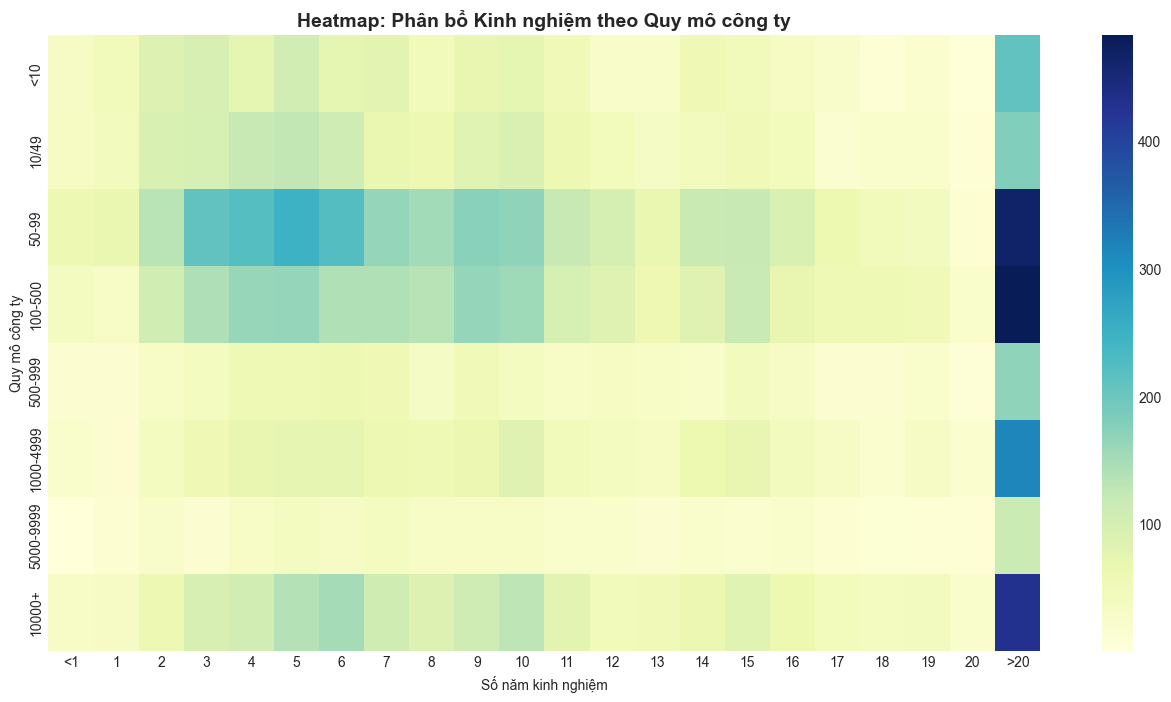


➤ NHẬN XÉT THÚ VỊ:
- Các công ty rất lớn (10000+) tập trung một lượng lớn nhân sự có thâm niên cực cao (>20 năm).
- Ngược lại, các công ty nhỏ (<10, 10/49) có sự phân bổ đều hơn ở các mức kinh nghiệm thấp và trung bình (startup thường thu hút nhân sự trẻ).
- Có một "vùng trũng" ở giữa: Nhân sự tầm trung (5-10 năm) dường như phân tán khá đều.



In [9]:
#Research Question 1 - Experience vs Company Size
print("\n=== Q1: EXPERIENCE vs COMPANY SIZE ===\n")

# 1. Lấy dữ liệu
exp_col_idx = headers.index('experience')
size_col_idx = headers.index('company_size')

# Lọc bỏ các dòng có missing values ở 2 cột này để visualize cho sạch
valid_mask = (data[:, exp_col_idx] != '') & (data[:, exp_col_idx] != 'nan') & \
             (data[:, size_col_idx] != '') & (data[:, size_col_idx] != 'nan')
data_q1 = data[valid_mask]

exp_data = data_q1[:, exp_col_idx]
size_data = data_q1[:, size_col_idx]

# 2. Định nghĩa thứ tự để vẽ biểu đồ cho logic (Sorting)
size_order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
exp_order = ['<1'] + [str(i) for i in range(1, 21)] + ['>20']

# 3. Tạo ma trận tần suất (Heatmap data)
heatmap_data = np.zeros((len(size_order), len(exp_order)))

for i, size in enumerate(size_order):
    for j, exp in enumerate(exp_order):
        count = np.sum((size_data == size) & (exp_data == exp))
        heatmap_data[i, j] = count

# 4. Vẽ biểu đồ Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, xticklabels=exp_order, yticklabels=size_order, 
            cmap="YlGnBu", annot=False)
plt.title('Heatmap: Phân bổ Kinh nghiệm theo Quy mô công ty', fontsize=14, fontweight='bold')
plt.xlabel('Số năm kinh nghiệm')
plt.ylabel('Quy mô công ty')
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Các công ty rất lớn (10000+) tập trung một lượng lớn nhân sự có thâm niên cực cao (>20 năm).
- Ngược lại, các công ty nhỏ (<10, 10/49) có sự phân bổ đều hơn ở các mức kinh nghiệm thấp và trung bình (startup thường thu hút nhân sự trẻ).
- Có một "vùng trũng" ở giữa: Nhân sự tầm trung (5-10 năm) dường như phân tán khá đều.
""")

### Câu hỏi 2 - Phân phối giờ đào tạo

#### Những người muốn nhảy việc (Target=1) có xu hướng dành nhiều hay ít thời gian đào tạo (Training Hours) hơn những người ổn định?


=== Q2: TRAINING HOURS DISTRIBUTION ===



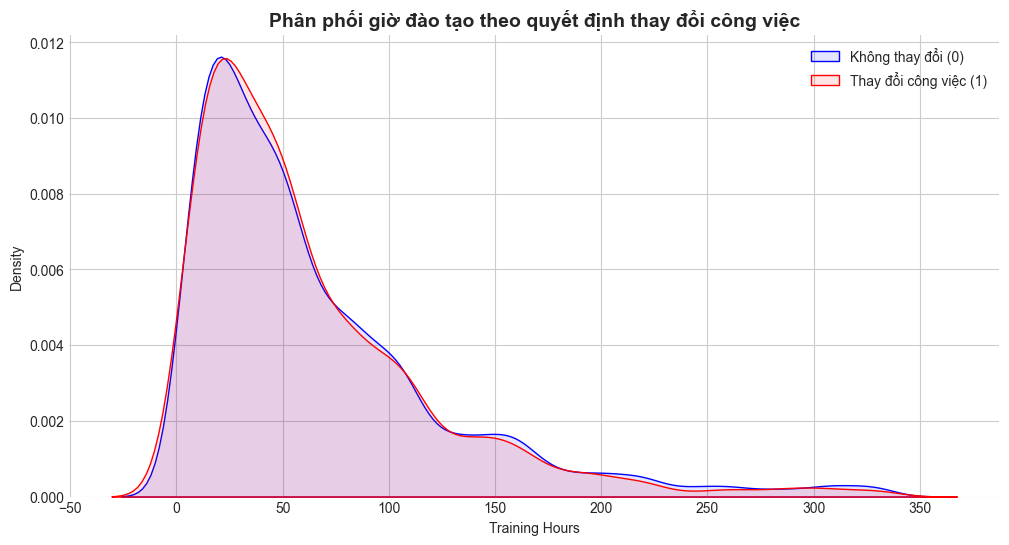


➤ NHẬN XÉT THÚ VỊ:
- Biểu đồ phân phối (Distribution) của hai nhóm gần như trùng khít nhau!
- Điều này rất ngạc nhiên: Số giờ đào tạo (Training Hours) dường như KHÔNG phải là yếu tố quyết định mạnh mẽ đến việc một người có muốn nhảy việc hay không.
- Dù bạn học nhiều hay ít, xác suất bạn muốn nghỉ việc là tương đương. Feature này có thể có độ quan trọng thấp (low feature importance) trong mô hình.



In [10]:
# Research Question 2 - Training Hours Distribution
print("\n=== Q2: TRAINING HOURS DISTRIBUTION ===\n")

# Sử dụng thêm thư viện warnings vì trong thư viện seaborn có pandas 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

train_hours_idx = headers.index('training_hours')
target_idx = headers.index('target')

# Chuyển đổi training_hours sang float để vẽ biểu đồ
# Xử lý missing values bằng cách bỏ qua hoặc điền median tạm thời
th_data = data[:, train_hours_idx]
# Fill missing tạm thời bằng median để không lỗi code vẽ
th_numeric = []
for val in th_data:
    try:
        th_numeric.append(float(val))
    except:
        th_numeric.append(np.nan)
th_numeric = np.array(th_numeric)
# Fill nan = median
th_numeric[np.isnan(th_numeric)] = np.nanmedian(th_numeric)

target_data = data[:, target_idx].astype(float)

# Vẽ biểu đồ KDE (Kernel Density Estimate)
plt.figure(figsize=(12, 6))
sns.kdeplot(th_numeric[target_data == 0], color='blue', label='Không thay đổi (0)', fill=True, alpha=0.1)
sns.kdeplot(th_numeric[target_data == 1], color='red', label='Thay đổi công việc (1)', fill=True, alpha=0.1)

plt.title('Phân phối giờ đào tạo theo quyết định thay đổi công việc', fontsize=14, fontweight='bold')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.legend()
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Biểu đồ phân phối (Distribution) của hai nhóm gần như trùng khít nhau!
- Điều này rất ngạc nhiên: Số giờ đào tạo (Training Hours) dường như KHÔNG phải là yếu tố quyết định mạnh mẽ đến việc một người có muốn nhảy việc hay không.
- Dù bạn học nhiều hay ít, xác suất bạn muốn nghỉ việc là tương đương. Feature này có thể có độ quan trọng thấp (low feature importance) trong mô hình.
""")

### Câu hỏi 3 - Trình độ học vấn & Khoảng cách thay đổi công việc

#### Trình độ học vấn (Education Level) có ảnh hưởng đến tần suất thay đổi công việc (Last New Job) không? Người có bằng cấp cao có xu hướng "nhảy việc" thường xuyên hơn hay ổn định hơn?


=== Q3: EDUCATION LEVEL vs LAST NEW JOB ===



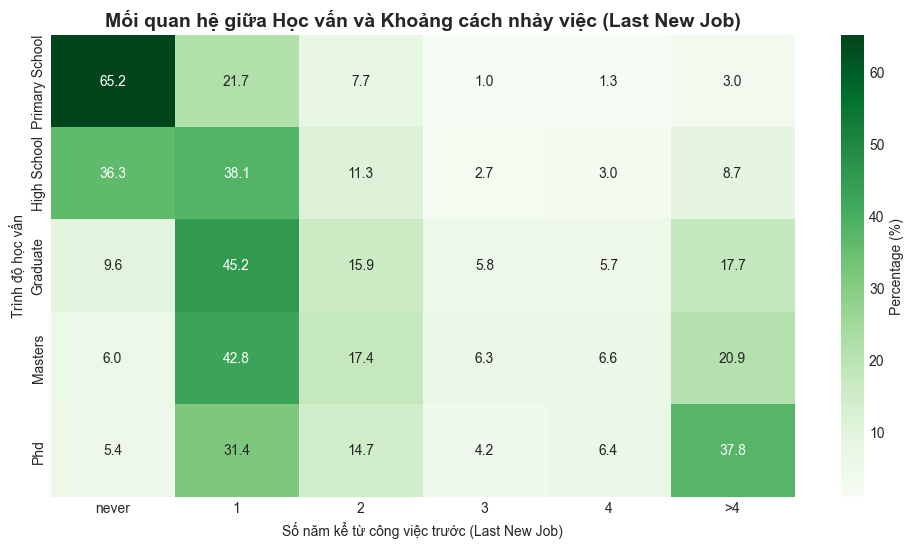


➤ NHẬN XÉT THÚ VỊ:
- Nhóm "Graduate" (Cử nhân) và "Masters" (Thạc sĩ) có xu hướng tương đồng nhau, phần lớn tập trung ở mức "1" năm (nhảy việc khá thường xuyên).
- Nhóm "Phd" (Tiến sĩ) có tỷ lệ ">4" (ổn định lâu dài) cao đáng kể so với các nhóm khác. Điều này cho thấy nhân sự cấp cao/chuyên sâu thường gắn bó với công việc lâu hơn.
- Nhóm "Primary School" và "High School" có tỷ lệ "never" (chưa từng đi làm trước đó) cao nhất, điều này hợp lý vì họ mới gia nhập thị trường lao động.



In [11]:
# Research Question 3 - Education Level vs Last New Job
print("\n=== Q3: EDUCATION LEVEL vs LAST NEW JOB ===\n")

edu_idx = headers.index('education_level')
job_idx = headers.index('last_new_job')

# Lọc data hợp lệ
mask_valid = (data[:, edu_idx] != '') & (data[:, edu_idx] != 'nan') & \
             (data[:, job_idx] != '') & (data[:, job_idx] != 'nan')
data_q3 = data[mask_valid]

# Định nghĩa thứ tự
edu_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
job_order = ['never', '1', '2', '3', '4', '>4']

# Tính toán tỷ lệ phần trăm (Normalize theo hàng - Education Level)
matrix_data = np.zeros((len(edu_order), len(job_order)))

for i, edu in enumerate(edu_order):
    edu_rows = data_q3[data_q3[:, edu_idx] == edu]
    total_in_edu = len(edu_rows)
    if total_in_edu > 0:
        for j, job in enumerate(job_order):
            count = np.sum(edu_rows[:, job_idx] == job)
            matrix_data[i, j] = count / total_in_edu * 100 # Tính phần trăm

# Vẽ Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matrix_data, xticklabels=job_order, yticklabels=edu_order, 
            cmap="Greens", annot=True, fmt='.1f', cbar_kws={'label': 'Percentage (%)'})
plt.title('Mối quan hệ giữa Học vấn và Khoảng cách nhảy việc (Last New Job)', fontsize=14, fontweight='bold')
plt.xlabel('Số năm kể từ công việc trước (Last New Job)')
plt.ylabel('Trình độ học vấn')
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Nhóm "Graduate" (Cử nhân) và "Masters" (Thạc sĩ) có xu hướng tương đồng nhau, phần lớn tập trung ở mức "1" năm (nhảy việc khá thường xuyên).
- Nhóm "Phd" (Tiến sĩ) có tỷ lệ ">4" (ổn định lâu dài) cao đáng kể so với các nhóm khác. Điều này cho thấy nhân sự cấp cao/chuyên sâu thường gắn bó với công việc lâu hơn.
- Nhóm "Primary School" và "High School" có tỷ lệ "never" (chưa từng đi làm trước đó) cao nhất, điều này hợp lý vì họ mới gia nhập thị trường lao động.
""")

### Câu hỏi 4 - Kinh nghiệm & Tỷ lệ nghỉ việc

#### Nhân viên ở giai đoạn nào của sự nghiệp (Số năm kinh nghiệm) có nguy cơ nghỉ việc cao nhất?


=== Q4: EXPERIENCE vs TARGET ===



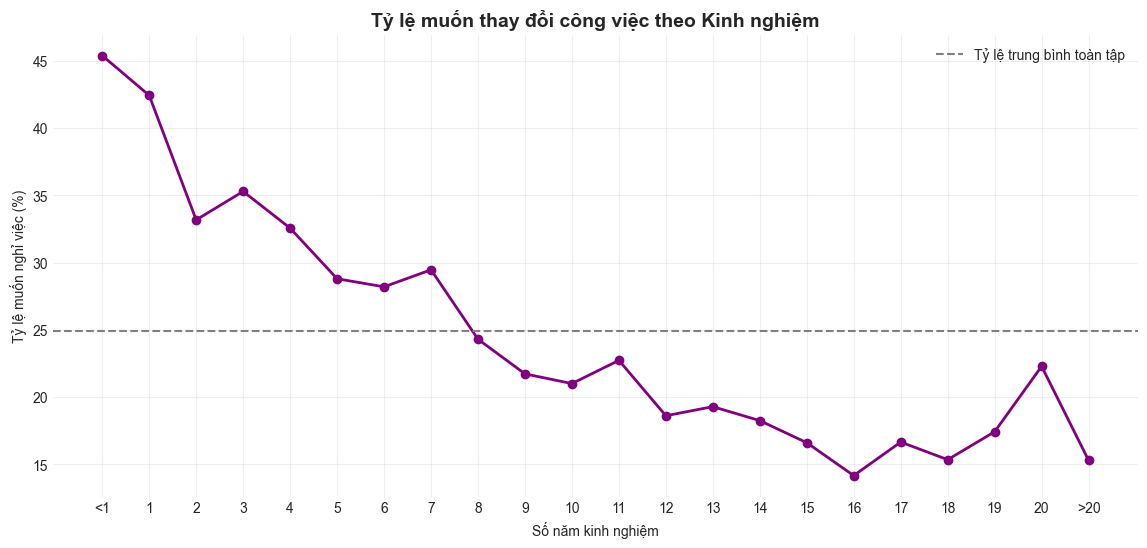


➤ NHẬN XÉT THÚ VỊ:
- Có một xu hướng giảm rõ rệt: Kinh nghiệm càng cao, tỷ lệ muốn nhảy việc càng thấp.
- Nhóm rủi ro cao nhất là nhóm "<1" năm đến "5" năm kinh nghiệm (Junior/Mid-level). Đây là giai đoạn nhân sự tích cực tìm kiếm cơ hội tốt hơn.
- Nhóm ">20" năm kinh nghiệm có tỷ lệ nhảy việc thấp nhất (rất ổn định).
- Điểm gãy (Elbow point): Sau khoảng 10 năm kinh nghiệm, tỷ lệ nghỉ việc bắt đầu đi ngang và thấp hơn mức trung bình.



In [12]:
# Research Question 4 - Experience vs Target (Churn Rate)
print("\n=== Q4: EXPERIENCE vs TARGET ===\n")

exp_col_idx = headers.index('experience')
target_idx = headers.index('target')

# Lấy dữ liệu và xử lý missing
mask_valid = (data[:, exp_col_idx] != '') & (data[:, exp_col_idx] != 'nan')
data_q4 = data[mask_valid]

exp_vals = data_q4[:, exp_col_idx]
target_vals = data_q4[:, target_idx].astype(float)

# Định nghĩa thứ tự
exp_order = ['<1'] + [str(i) for i in range(1, 21)] + ['>20']
churn_rates = []

for exp in exp_order:
    # Lấy target của nhóm kinh nghiệm này
    subset_target = target_vals[exp_vals == exp]
    if len(subset_target) > 0:
        # Tính trung bình target (chính là tỷ lệ nghỉ việc vì target là 0/1)
        rate = np.mean(subset_target) * 100
    else:
        rate = 0
    churn_rates.append(rate)

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 6))
plt.plot(exp_order, churn_rates, marker='o', linestyle='-', color='purple', linewidth=2)
plt.axhline(y=np.mean(target_vals)*100, color='gray', linestyle='--', label='Tỷ lệ trung bình toàn tập')

plt.title('Tỷ lệ muốn thay đổi công việc theo Kinh nghiệm', fontsize=14, fontweight='bold')
plt.xlabel('Số năm kinh nghiệm')
plt.ylabel('Tỷ lệ muốn nghỉ việc (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Có một xu hướng giảm rõ rệt: Kinh nghiệm càng cao, tỷ lệ muốn nhảy việc càng thấp.
- Nhóm rủi ro cao nhất là nhóm "<1" năm đến "5" năm kinh nghiệm (Junior/Mid-level). Đây là giai đoạn nhân sự tích cực tìm kiếm cơ hội tốt hơn.
- Nhóm ">20" năm kinh nghiệm có tỷ lệ nhảy việc thấp nhất (rất ổn định).
- Điểm gãy (Elbow point): Sau khoảng 10 năm kinh nghiệm, tỷ lệ nghỉ việc bắt đầu đi ngang và thấp hơn mức trung bình.
""")